# Imports

In [2]:
import mat73
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from IPython.display import display, HTML
from tqdm import tqdm
import pickle

import warnings
warnings.filterwarnings("ignore")

# Loading Data

In [3]:
data = mat73.loadmat("dataset/VitalDB_AAMI_Test_Subset.mat")
data["Subset"]["Signals"] = [np.array(array) for array in data["Subset"]["Signals"]]
data_df = pd.DataFrame(data["Subset"])

In [4]:
data_df

,Age,BMI,DBP,Gender,Height,SBP,Signals,Subject,Weight
0,26.0,26.3,57.966649,[M],183.9,99.987120,"[[0.36403973055607636, 0.3798729789472614, 0.4...",[p000238_1],89.05
1,26.0,26.3,58.320482,[M],183.9,100.759058,"[[0.29321360098768473, 0.2860885144086844, 0.2...",[p000238_1],89.05
2,26.0,26.3,59.022303,[M],183.9,102.019124,"[[0.3234821974411744, 0.32359610215460555, 0.3...",[p000238_1],89.05
3,26.0,26.3,59.802165,[M],183.9,102.834648,"[[0.6553748906811834, 0.667645292549456, 0.684...",[p000238_1],89.05
4,26.0,26.3,58.068798,[M],183.9,100.265742,"[[0.30340272774572963, 0.3021664670400199, 0.3...",[p000238_1],89.05
...,...,...,...,...,...,...,...,...,...
661,51.0,23.6,67.354875,[M],186.0,158.041383,"[[0.16495809222382543, 0.15759405428417678, 0....",[p006055_1],81.60
662,51.0,23.6,66.764646,[M],186.0,154.649431,"[[0.44585714955877265, 0.4531576496332196, 0.4...",[p006055_1],81.60
663,51.0,23.6,67.429088,[M],186.0,160.446045,"[[0.33331191534757354, 0.29681460869229337, 0....",[p006055_1],81.60
664,51.0,23.6,69.336335,[M],186.0,165.430557,"[[0.6019641669273851, 0.6013251725554011, 0.59...",[p006055_1],81.60


In [5]:
data_df["Gender"] = data_df["Gender"].astype("str").replace(["['M']", "['F']"], [1, 0]).astype("category")

## Visualization of Signals

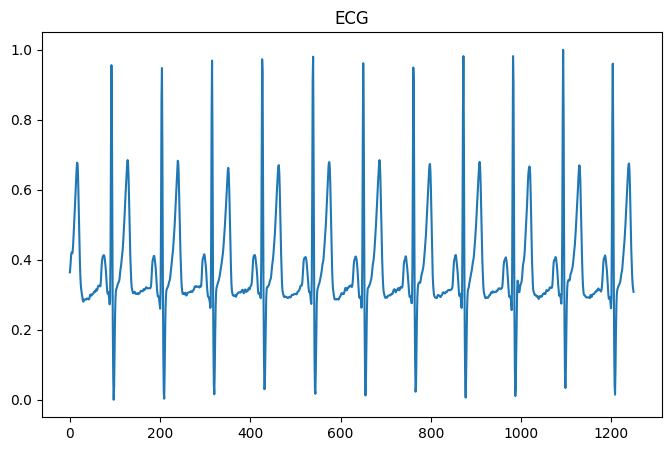

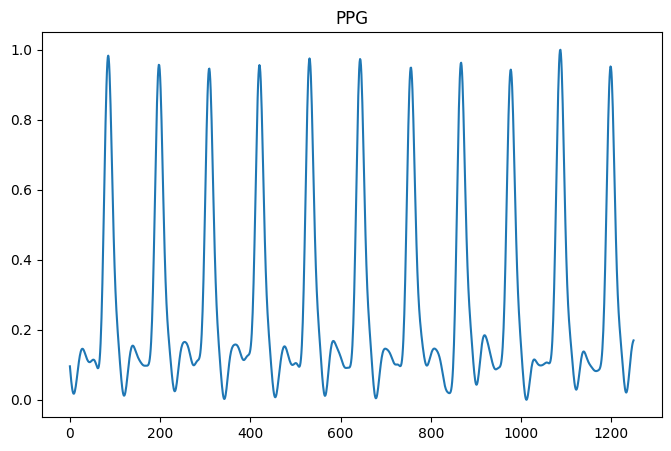

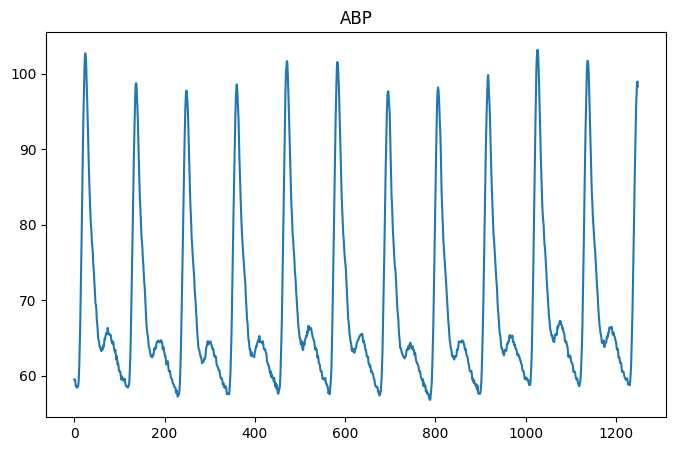

In [6]:
signals = data_df.loc[0]["Signals"]

def plot_signal (title, signal):
    plt.figure(figsize = (8, 5))
    plt.plot(signal)
    plt.title(title)
    plt.show()

for i, title in enumerate(["ECG", "PPG", "ABP"]):
    plot_signal(title, signals[i])

In [7]:
data_df.loc[:, "Signals"] = data_df.loc[:, "Signals"].apply(lambda x: x[1])

In [8]:
data_df = data_df.rename(
    columns = {
        "Age": "age",
        "BMI": "bmi",
        "DBP": "dbp",
        "SBP": "sbp",
        "Gender": "gender",
        "Height": "height",
        "Signals": "signal",
        "Subject": "subject",
        "Weight": "weight"
    }
)

In [9]:
data_df = data_df[["gender", "age", "weight", "height", "bmi", "signal", "dbp", "sbp"]]

In [10]:
data_df

,gender,age,weight,height,bmi,signal,dbp,sbp
0,1,26.0,89.05,183.9,26.3,"[0.09558564133507576, 0.08034762507124568, 0.0...",57.966649,99.987120
1,1,26.0,89.05,183.9,26.3,"[0.9297905141750652, 0.9399888619322257, 0.939...",58.320482,100.759058
2,1,26.0,89.05,183.9,26.3,"[0.12351961433660608, 0.12247612139897121, 0.1...",59.022303,102.019124
3,1,26.0,89.05,183.9,26.3,"[0.06187197844682026, 0.04972063498197406, 0.0...",59.802165,102.834648
4,1,26.0,89.05,183.9,26.3,"[0.17820817689407467, 0.17872682753601465, 0.1...",58.068798,100.265742
...,...,...,...,...,...,...,...,...
661,1,51.0,81.60,186.0,23.6,"[0.2612889579209523, 0.24247805817040835, 0.22...",67.354875,158.041383
662,1,51.0,81.60,186.0,23.6,"[0.6524835843199924, 0.6342669050545015, 0.618...",66.764646,154.649431
663,1,51.0,81.60,186.0,23.6,"[0.203036472140417, 0.18776552828829857, 0.172...",67.429088,160.446045
664,1,51.0,81.60,186.0,23.6,"[1.0, 0.99346053784738, 0.982223957031127, 0.9...",69.336335,165.430557


## Visualization of Data

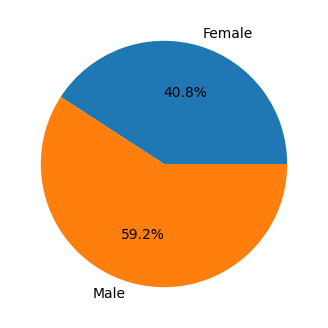

In [11]:
plt.figure(figsize = (4, 4))
data_df["gender"].value_counts().sort_index().plot(
    kind = "pie",
    rot = 0,
    autopct = "%1.1f%%",
    labels = ["Female", "Male"],
    ylabel = ""
)
plt.show()

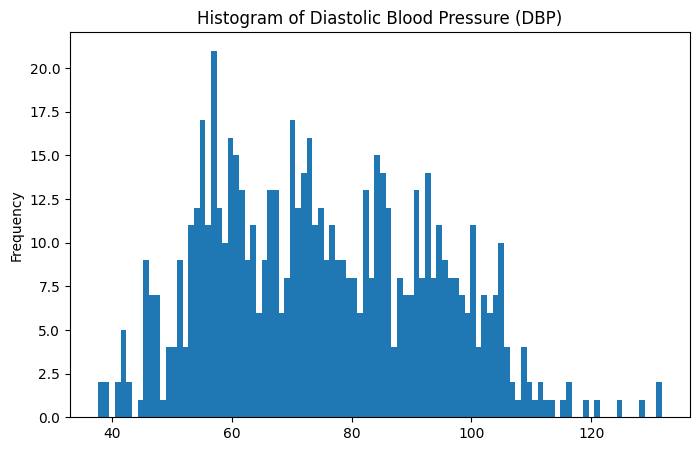

In [12]:
plt.figure(figsize = (8, 5))
data_df["dbp"].plot.hist(bins = 100)
plt.title("Histogram of Diastolic Blood Pressure (DBP)")
plt.show()

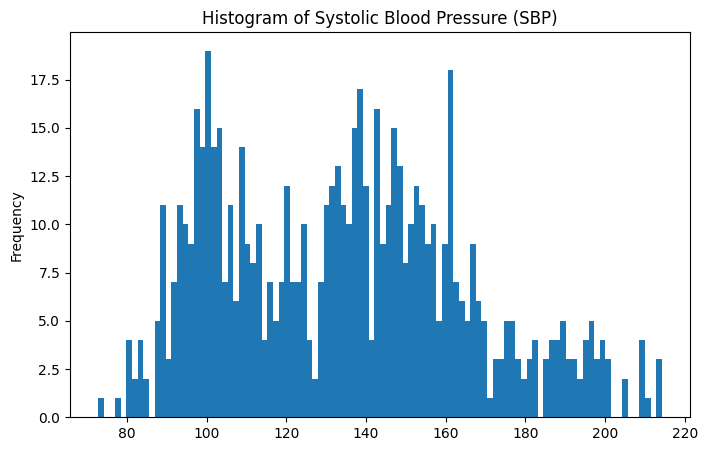

In [13]:
plt.figure(figsize = (8, 5))
data_df["sbp"].plot.hist(bins = 100)
plt.title("Histogram of Systolic Blood Pressure (SBP)")
plt.show()

# Exporting Data

In [14]:
data_df["dbp"] = pd.to_numeric(data_df["dbp"])
data_df["sbp"] = pd.to_numeric(data_df["sbp"])

In [15]:
data_df

,gender,age,weight,height,bmi,signal,dbp,sbp
0,1,26.0,89.05,183.9,26.3,"[0.09558564133507576, 0.08034762507124568, 0.0...",57.966649,99.987120
1,1,26.0,89.05,183.9,26.3,"[0.9297905141750652, 0.9399888619322257, 0.939...",58.320482,100.759058
2,1,26.0,89.05,183.9,26.3,"[0.12351961433660608, 0.12247612139897121, 0.1...",59.022303,102.019124
3,1,26.0,89.05,183.9,26.3,"[0.06187197844682026, 0.04972063498197406, 0.0...",59.802165,102.834648
4,1,26.0,89.05,183.9,26.3,"[0.17820817689407467, 0.17872682753601465, 0.1...",58.068798,100.265742
...,...,...,...,...,...,...,...,...
661,1,51.0,81.60,186.0,23.6,"[0.2612889579209523, 0.24247805817040835, 0.22...",67.354875,158.041383
662,1,51.0,81.60,186.0,23.6,"[0.6524835843199924, 0.6342669050545015, 0.618...",66.764646,154.649431
663,1,51.0,81.60,186.0,23.6,"[0.203036472140417, 0.18776552828829857, 0.172...",67.429088,160.446045
664,1,51.0,81.60,186.0,23.6,"[1.0, 0.99346053784738, 0.982223957031127, 0.9...",69.336335,165.430557


In [16]:
with open("dataset/data.pickle", "wb") as handler:
    pickle.dump(data_df.to_numpy(), handler)